In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})

## 分析の概要と目的
重回帰分析_data3.ipynbでは温度と曜日の変量のみを用いて重回帰分析を行った.この分析における自由度調整済み決定係数は0.447で,これはモデルがデータを44.7%説明できることを意味する.本分析の目的は前回の分析で使用していない変数を他も用いて,より精度の高い販売数の予測を行うことである.

In [3]:
df = pd.read_csv("data3.csv")
df["datetime"] = pd.to_datetime(df["datetime"], format='%Y-%m-%d')
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


## 全ての変数を用いた重回帰分析
まず,全ての変数を用いて重回帰分析を行ってみる.

In [6]:
import statsmodels.api as sm 

# 欠損値を全ての0で置換
df.fillna(0, inplace=True)
df.loc[df['precipitation'].str.contains('--'), 'precipitation'] = '0'

X = pd.get_dummies(df[["week", "soldout", "name", "kcal", "remarks", "event", "payday", "weather", "precipitation", "temperature"]]) # 説明変数
y = df["y"] 

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     3.041
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           0.000216
Time:                        20:21:58   Log-Likelihood:                -719.80
No. Observations:                 207   AIC:                             1790.
Df Residuals:                      32   BIC:                             2373.
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               83.6741     10.900      7.677      0.000      61.472     105.876
soldout                              5.4053      6.507      0.831      0.412      -7.849      18.660
kcal                                -0.1101      0.022     -5.016      0.000      -0.155      -0.065
payday                              10.3622     12.654      0.819      0.419     -15.413      36.137
temperature                         -2.2304      0.633     -3.525      0.001      -3.519      -0.941
week_月                              28.3798      8.051      3.525      0.001      11.981      44.779
week_木                              14.0490      7.339      1.914      0.065      -0.901      28.999
week_水                              17.3373      7.508      2.309      0.028       2.043      32.632
week_火                              22.6411      8.039      2.816      0.008       6.266      39.016
week_金                               1.2669      8.103      0.156      0.877     -15.238      17.772
name_いか天ぷら                           7.2024     24.363      0.296      0.769     -42.424      56.829
name_かじきの甘辛煮                        -6.2375     21.761     -0.287      0.776     -50.562      38.088
name_きのこソースハンバーグ                    -4.7637     22.904     -0.208      0.837     -51.417      41.890
name_さっくりメンチカツ                     -18.5650     23.410     -0.793      0.434     -66.250      29.120
name_さわら焼味噌掛け                       -1.5281     36.007     -0.042      0.966     -74.871      71.815
name_さんま辛味焼                         32.5971     26.604      1.225      0.229     -21.593      86.787
name_たっぷりベーコンフライ                    -8.8934     21.976     -0.405      0.688     -53.657      35.871
name_ひやしたぬきうどん・炊き込みご飯              -13.0613     41.309     -0.316      0.754     -97.205      71.083
name_ぶりレモンペッパー焼き                    -8.4726     25.091     -0.338      0.738     -59.580      42.635
name_ますのマスタードソース                    13.3258     25.367      0.525      0.603     -38.345      64.996
name_やわらかロースのサムジョン                   0.2096     41.914      0.005      0.996     -85.166      85.585
name_アジ唐揚げ南蛮ソース                      4.0557     22.750      0.178      0.860     -42.284      50.395
name_エビフライ                           9.4964     24.041      0.395      0.695     -39.474      58.467
name_カキフライタルタル                      13.2502     22.962      0.577      0.568     -33.522      60.022
name_カレイの唐揚げ                        -3.4375     22.562     -0.152      0.880     -49.396      42.521
name_カレイ唐揚げ 甘酢あん                   -10.8869     22.243     -0.489      0.628     -56.194      34.420
name_カレイ唐揚げ夏野菜あん                    -5.7456     22.220     -0.259      0.798     -51.006      39.515
name_カレイ唐揚げ野菜あんかけ                   -4.7054     16.70

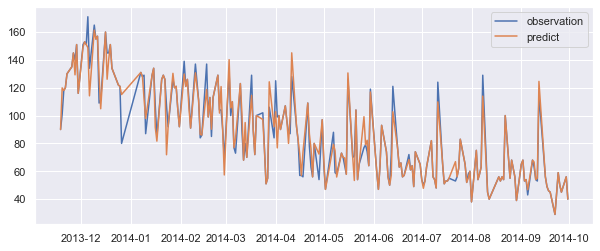

In [7]:
# 観測値yと予測値の比較
pred = results.predict(sm.add_constant(X))
plt.figure(facecolor="white",figsize=(10,4))
plt.plot(df["datetime"],df["y"],label="observation")
plt.plot(df["datetime"],pred,label="predict")
plt.legend()
plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


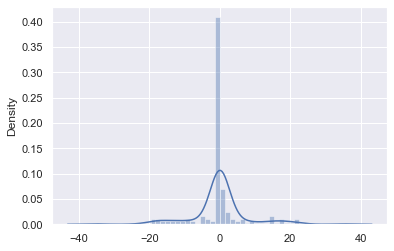

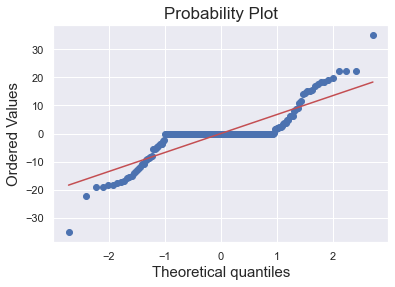

In [8]:
from scipy import stats

# 残差のプロット
resid = results.resid # 残差を取得
# カーネル密度
plt.figure()
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid,dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

## 結果の解釈
- 自由度調整済み決定係数は0.633であり,以前のモデルと比較すると精度が向上したといえる.
- t検定の結果,P値が0.000216で有意であり,このモデルは統計的に意味のあるものといえる.
- P>|t|が0.05を上回っている説明変数があり,この説明変数は統計的に意味のある説明変数とはいえない.
- 誤差の分布は正規分布に従うと結論づけるのは難しい.

## P値が0.05以下の説明変数のみで重回帰分析を行う

In [9]:
extracted = results.pvalues[results.pvalues < 0.05].index
extracted = extracted.drop(["const"])

# 欠損値を全ての0で置換
df.fillna(0, inplace=True)
df.loc[df['precipitation'].str.contains('--'), 'precipitation'] = '0'

X = pd.get_dummies(df[["week", "soldout", "name", "kcal", "remarks", "event", "payday", "weather", "precipitation", "temperature"]]) # 説明変数
X = X[extracted]
y = df["y"] 

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     62.56
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           4.01e-50
Time:                        20:22:11   Log-Likelihood:                -885.78
No. Observations:                 207   AIC:                             1790.
Df Residuals:                     198   BIC:                             1820.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 114.9560      3.692     31.137      0.000     107.675     122.237
kcal                   -0.1034      0.008    -13.306      0.000      -0.119      -0.088
temperature            -2.2851      0.146    -15.658      0.000      -2.573      -1.997
week_月                 19.5101      3.549      5.498      0.000      12.512      26.508
week_水                  8.1672      3.399      2.402      0.017       1.463      14.871
week_火                 11.3408      3.458      3.280      0.001       4.522      18.160
name_筑前煮              -49.1917     18.117     -2.715      0.007     -84.920     -13.464
event_0                42.1502      2.883     14.622      0.000      36.466      47.835
event_キャリアアップ支援セミナー    33.8669      6.327      5.353      0.000      21.391      46.343
event_ママの会             38.9388      4.982      7.815      0.000      29.113      48.764
==============================================================================
Omnibus:                        1.906   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.716
Skew:                           0.000   Prob(JB):                        0.424
Kurtosis:                       3.446   Cond. No.                     1.62e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

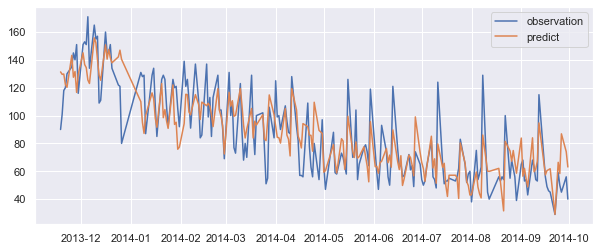

In [10]:
# 観測値yと予測値の比較
pred = results.predict(sm.add_constant(X))
plt.figure(facecolor="white",figsize=(10,4))
plt.plot(df["datetime"],df["y"],label="observation")
plt.plot(df["datetime"],pred,label="predict")
plt.legend()
plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


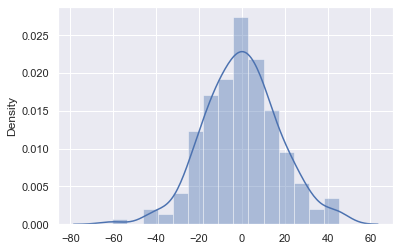

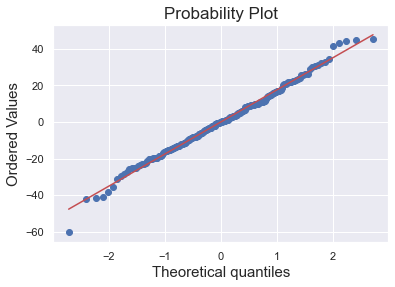

In [11]:
# 残差のプロット
resid = results.resid # 残差を取得
# カーネル密度
plt.figure()
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid,dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

## 結果の解釈
- 自由度調整済み決定係数は0.705で,このモデルはデータを70.5%説明できる.全ての変数を含めたときは,自由度調整済み決定係数は0.633であったが,統計的に意味のない変数を除去したことで,モデルの説明能力が高まった.
- t検定の結果,P値が4.01e-50で有意であり,このモデルは統計的に意味のあるものといえる.
- すべての説明変数のP値が0.05以下であるから統計的に意味があると言える.
- 残差のプロットから,残差が正規分布に従うと結論付ける.

## 多重共線性の検出と対処
多重共線性(multicollinearity)とは,互いに関連性の高い説明変数が存在するときに分析結果や精度が不安定になる現象である.多重共線性が起こりやすい条件としては次に示す2つがあげられる.
- 説明変数間の相関係数の絶対値が1に近い組合わせが存在する.
- サンプルサイズに対して説明変数の数が大きすぎる.

多重共線性を検知する方法は次に示す3つの方法がある.
- 説明変数間の相関係数を確認する.
- 説明変数の相関行列の条件数を評価する.
- VIF(Variance Inflation Factor)を用いる.

## 説明変数間の相関係数の確認
seabornのheatmapを用いて相関係数を確認することができる.しかしこの方法は,ダミー化していない変数は自動で除外されるため,多重共線性を持つ変数がダミー変数である場合は検知することができない.ダミー化した変数で相関係数を計算しても,同様である.

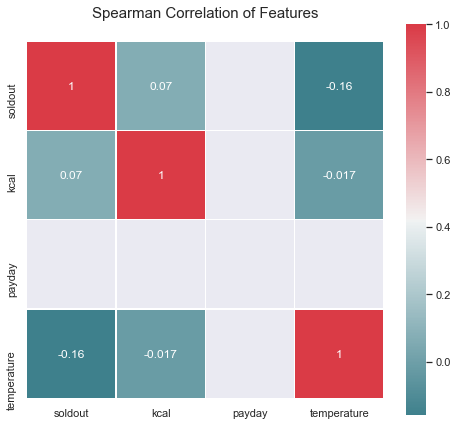

In [5]:
X = df.drop(columns=["y"])
fig , ax = plt.subplots(figsize =(8, 8),facecolor='white')
colormap = sns.diverging_palette(210,10, as_cmap = True)
corr = X.corr(method='spearman') # pearson spearman kendall
fig = sns.heatmap(
        corr, 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, #めちゃくちゃになったらFalse
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
plt.title('Spearman Correlation of Features', y=1.05, size=15) # pearson spearman kendall
plt.show()

## 条件数による説明変数の相関行列の評価
条件数(Condition Number)とは連立方程式をコンピュータで解く際に,その連立方程式の数値解析のしやすさ(誤差の乗りやすさ)を示す指標である.行列Aの条件数$Cond(A)$は,行列Aの最大特異値$\sigma_{max}$,$\sigma_{min}$を用いて次のように定義される.この条件数が大きければ,連立方程式の解は丸め誤差の影響を強く受けるため,誤差が乗りやすい.
$$Cond(A) = \frac{\sigma_{max}}{\sigma_{min}}$$

行列Aが対称行列のとき,特異値は固有値と一致する.重回帰分析ではこの性質を用いて説明変数の条件数を計算する.条件数の基準として,20を超えるモデルは問題がある(=多重共線性が見られる)と判断する.

今考えているデータでは,全ての変数を用いたモデルの条件数が4.55e+19,P値が0.05より大きい変数を除外したモデルの条件数が1.62e+18で,どちらのモデルでも多重共線性が生じていると考えられる.

## VIF(Variance Inflation Factor)
条件数を用いることで,モデルに多重共線性が生じているかどうかを判断することができるが,どの変数が多重共線性の原因になっているかまで判断することはできない.VIFはどの変数が多重共線性の原因になっているかの指標である.目的変数$Y$,説明変数$X_1,X_2,...,X_n$のときのVIFの求め方について説明する.VIFを求めたい説明変数$X_i$とすると,まず$X_i$を目的変数として残りの説明変数で$X_i$の回帰を行う.そしてこの決定係数$R_i^2$とする.VIFは決定係数$R_i^2$を用いて次のように定義される.
$$VIF = \frac{1}{1-R_i^2}$$

一般にVIFが10(公式ドキュメントでは5)を超える変数は依存関係が強い(=多重共線性が生じている)と判断する.

下のセルは,温度と曜日のみ例でVIF値を計算したものである.VIF値から曜日のカラムの依存関係が強いことがわかる.
(注意:目的が「因果関係の洞察」の場合は説明変数から除外するべきであるが,「予測」の場合は除外しなくてもよい)

In [14]:
import statsmodels.api as sm 
simple = df[["datetime","y","week","temperature"]]

X = pd.get_dummies(simple[["temperature","week"]]) # 曜日をダミー変数化
y = simple["y"]

model = sm.OLS(y,sm.add_constant(X)) # sm.add_constant() : 切片を追加して形を整える
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     34.30
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           2.91e-25
Time:                        21:19:27   Log-Likelihood:                -952.41
No. Observations:                 207   AIC:                             1917.
Df Residuals:                     201   BIC:                             1937.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         113.0760      3.486     32.437      0.000     106.202     119.950
temperature    -2.5388      0.198    -12.800      0.000      -2.930      -2.148
week_月         30.8786      3.569      8.651      0.000      23.841      37.917
week_木         13.1428      3.394      3.872      0.000       6.450      19.836
week_水         20.5865      3.396      6.063      0.000      13.891      27.282
week_火         24.4677      3.513      6.965      0.000      17.541      31.395
week_金         24.0004      3.496      6.866      0.000      17.107      30.893
==============================================================================
Omnibus:                       23.275   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.801
Skew:                           0.809   Prob(JB):                     9.18e-07
Kurtosis:                       3.779   Cond. No.                     1.71e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

num_cols = model.exog.shape[1] # 説明変数の列数
vifs = [vif(model.exog, i) for i in range(0, num_cols)]

pd.DataFrame(vifs, index=model.exog_names, columns=['VIF'])

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
const,0.000000
temperature,1.004927
week_月,inf
week_木,inf
week_水,inf
week_火,inf
week_金,inf
